### Gradient Descent with 2nd Degree Polynomial

https://mp.weixin.qq.com/s/viWkUbZ294rBXzyVpYc9qw 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
coeffs = [2, -5,4]

def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.
    
    Args:
        coeffs: list containing the coefficients a,b,c for the polynomial
        x: the input x value to the polynomial.
    
    Returns:
        y: the corresponding output y value for the second degree polynomial.
    
    """
    a = (coeffs[0] * (x ** 2))
    b = coeffs[1] * x
    c = coeffs[2]
    
    return a + b + c 
    

In [3]:
eval_2nd_degree(coeffs, 2 )


2

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Original Data')

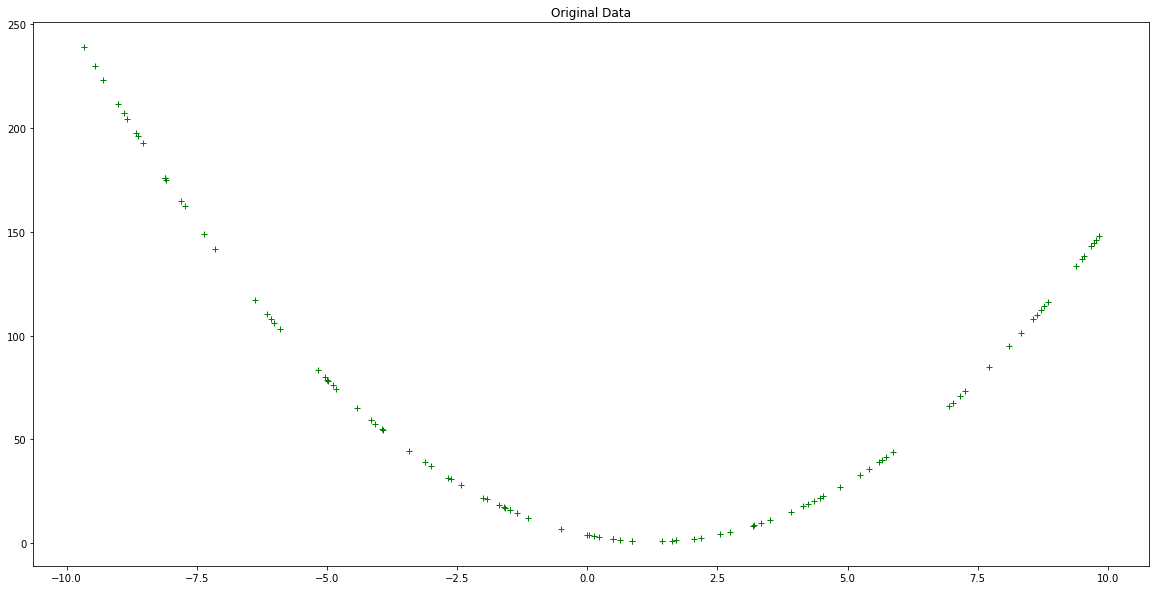

In [4]:
import numpy as np
import matplotlib.pyplot as plt

hundred_xs = np.random.uniform(-10, 10, 100)
#print(hundred_xs)

x_y_pairs = []
for x in hundred_xs:
    y = eval_2nd_degree(coeffs, x)
    x_y_pairs.append((x,y))

xs = []
ys = []

for a, b in x_y_pairs:
    xs.append(a)
    ys.append(b)

plt.figure(figsize = (20,10))
plt.plot(xs, ys, 'g+');
plt.title("Original Data")
plt.show()

In [5]:
# add "jitter" to make the original data not so much perfect
import random
coeffs = [2, -5, 4]

def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output value can be in range [y - j, y + j]
    
    Args:
        coeffs: list containing the coefficients a,b,c for the polynomial
        x: the input x value to the polynomial.
        j: jitter parameter, to introduce noise to output y. 
    
    Returns:
        y: the corresponding jitter output y value for the second degree polynomial.
    
    """
    a = (coeffs[0] * (x ** 2))
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c 
    #print(y)
    
    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    
    #print(f"Should get the value between: {interval_min} - {interval_max}")
    jit_val = random.random() * interval_max
    
    while interval_min > jit_val:
        jit_val = random.random() * interval_max 
    
    return jit_val

In [6]:
eval_2nd_degree_jitter(coeffs, 2, 0.7)

2.4701971549514847

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'Original Data')

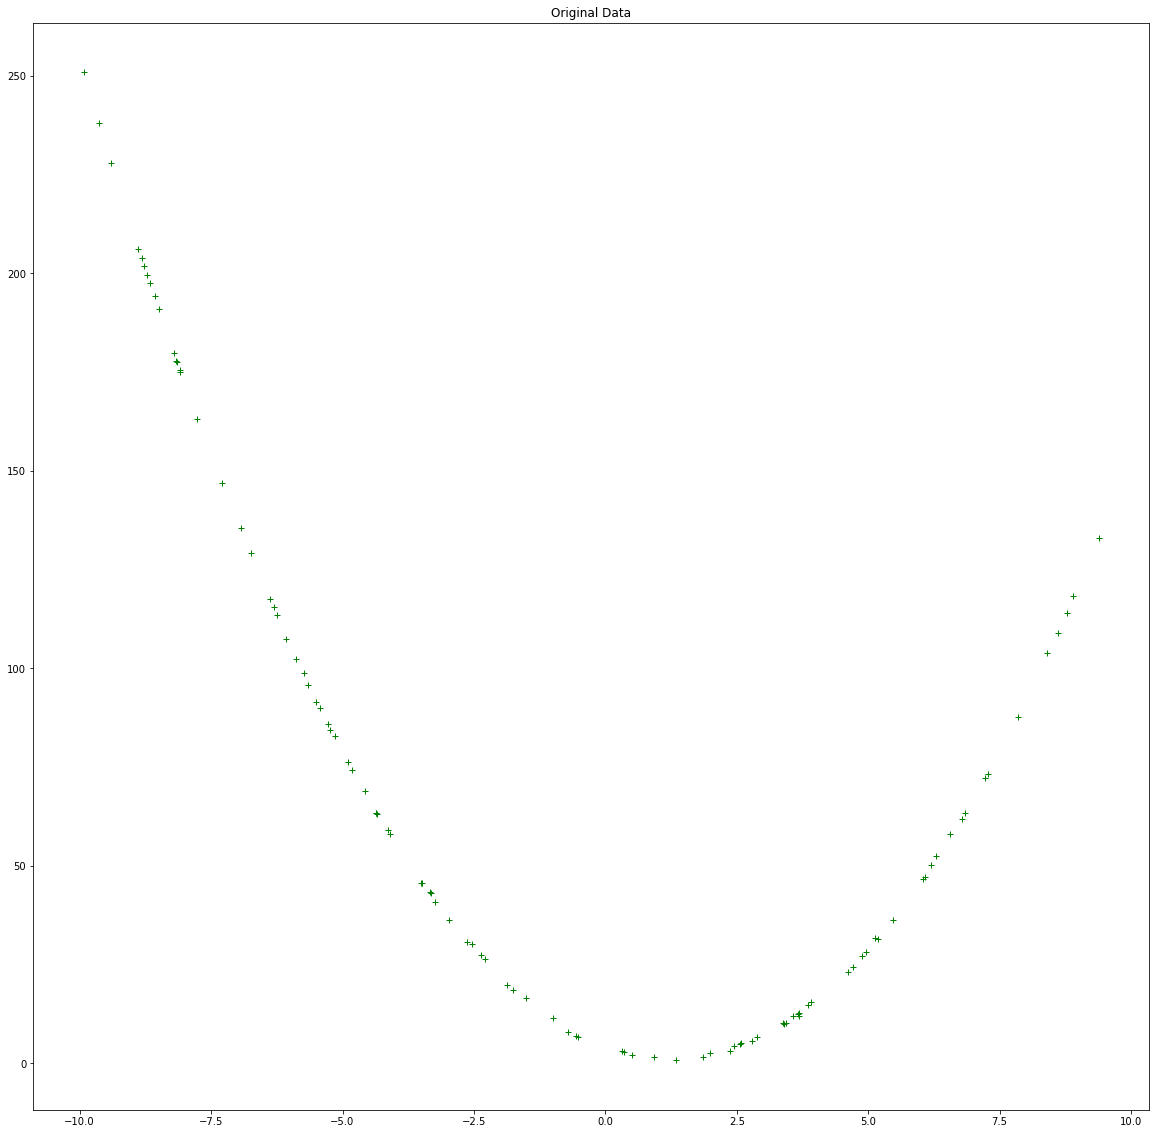

In [7]:
import numpy as np
import matplotlib.pyplot as plt

hundred_xs = np.random.uniform(-10, 10, 100)
#print(hundred_xs)

x_y_pairs = []
jitter = 0.7
for x in hundred_xs:
    y = eval_2nd_degree_jitter(coeffs, x, jitter)
    x_y_pairs.append((x,y))

xs = []
ys = []

for a, b in x_y_pairs:
    xs.append(a)
    ys.append(b)

plt.figure(figsize = (20,20))
plt.plot(xs, ys, 'g+');
plt.title("Original Data")
plt.show()

#### 建模第一步： 尝试一个随机模型

为二次多项式($ ax^2 + bx +c$) 生成和存储随机系数。

这将是我们的初始模型，他很可能不那么精确，目标时改进它，知道它与数据吻合。

In [8]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
rand_coeffs

(-10, 9, -4)

通过计算输入值的预测输出值来检查这个模型的准确性。

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'Original data vs. first prediction')

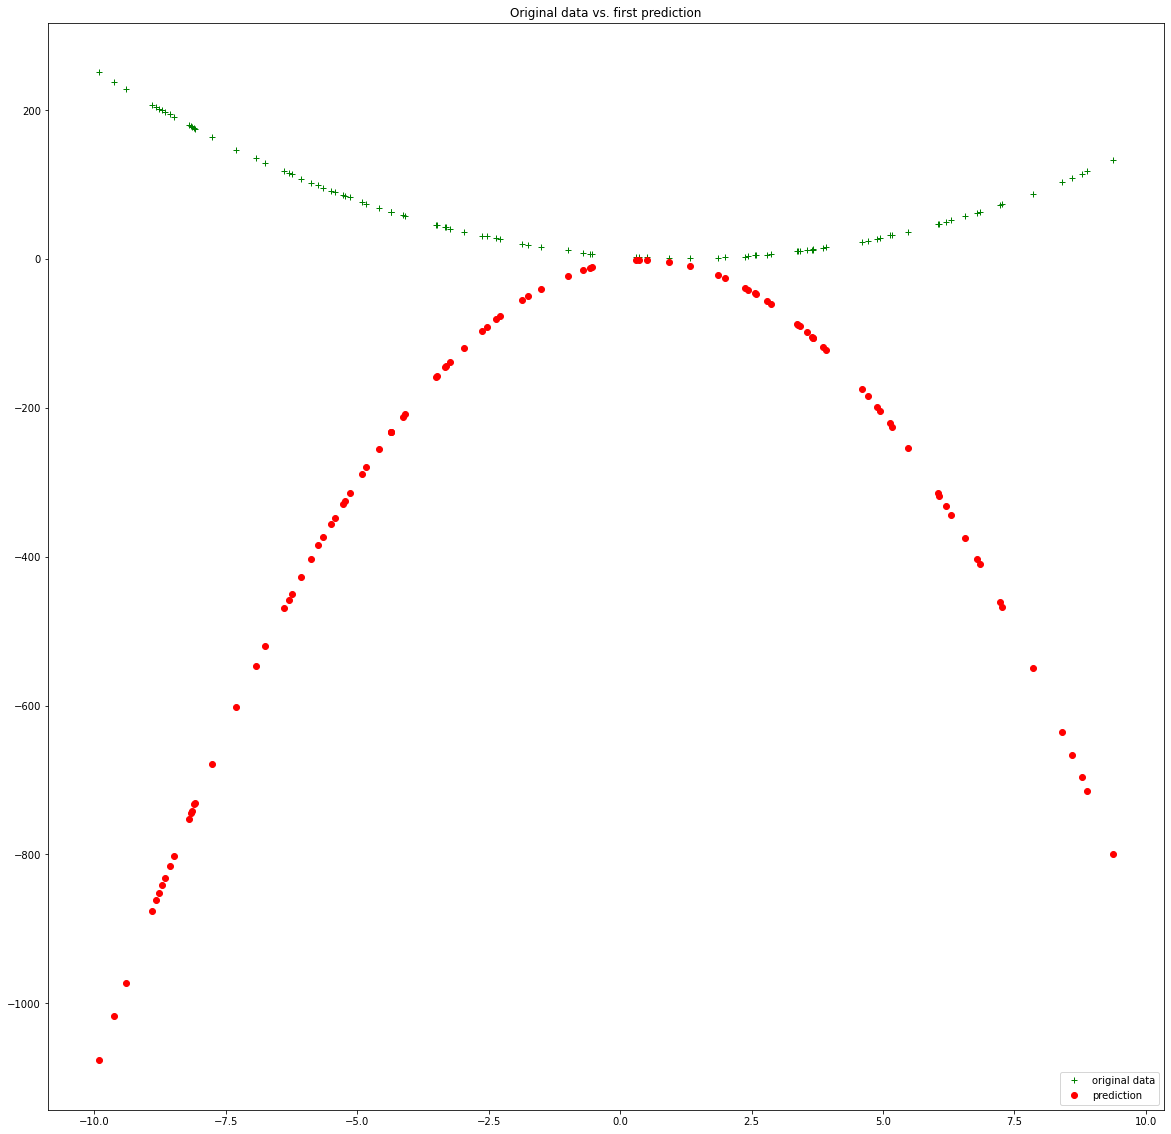

In [9]:
y_hat = eval_2nd_degree(rand_coeffs, hundred_xs)

plt.figure(figsize=(20,20))
plt.plot(xs, ys, 'g+', label = 'original data')
plt.plot(xs, y_hat, 'ro', label = 'prediction')
plt.title('Original data vs. first prediction')
plt.legend(loc='lower right')
plt.show()

从上面的图可以明显看出，这个带有随机系数的新模型并不完全符合我们的数据。

为了定量描述这个模型多不正确，计算模型的**均方误差**。这是实际输出($y_i$)和预测输出($\hat y_i$)之差的平方和的平均值。

$$ E = \cfrac{1}{n} \sum_{i=0}^{n}{(y_i - \hat y_i)^2} $$

In [10]:
def loss_mse(ys, y_hat):
    """Calculate MSE Loss.
       
       Args:
           ys: training data labels
           y_hat: prediction labels
        
       Returns:
           calculated MSE loss.
    """
    return sum((ys - y_hat) ** 2) / len(ys)

initial_model_loss = loss_mse(ys, y_hat)

initial_model_loss

287245.215164993

相当大的误差。让我们看看能否通过梯度下降优化模型来改善这个相当高的损失值。

#### 梯度下降和损失减少

我们希望改变它的系数a,b,c 以减少误差。因此，我们需要知道**每个系数是如何影响误差的**。

这是通过**计算损失函数对每个单独系数的偏导数来实现的**。

$$ E = \cfrac{1}{n} \sum_{i=0}^{n}{(y_i - \hat y_i)^2} $$

我们的模型预测如下：

$$ \hat y_i = ax_i^2 + bx_i + c $$

因此，损失函数可以重新表述为：

$$ E = \cfrac{1}{n} \sum_{i=0}^{n}{(y_i - (ax_i^2 + bx_i + c))^2} $$

在这个例子中，损失函数的偏导数如下:

- partial derivative with respect to a:

$$ g_a = \cfrac{dE}{da} = \cfrac{-2}{n}\sum_{i=0}^{n}{x_i^2(y_i - (ax_i^2 + bx_i + c))} $$

- partial derivative with respect to b:

$$ g_b = \cfrac{dE}{db} = \cfrac{-2}{n}\sum_{i=0}^{n}{x_i(y_i - (ax_i^2 + bx_i + c))} $$

- partial derivative with respect to c:

$$ g_c = \cfrac{dE}{dc} = \cfrac{-2}{n}\sum_{i=0}^{n}{(y_i - (ax_i^2 + bx_i + c))} $$

可以得出：

- 如果计算每个倒数的值，得到**每个系数的梯度($g_a, g_b, g_c$)**。

- 这些值给出了**损失函数相对于每个特定系数的斜率**。

- 它们表明应该增加还是减少它，来减少损失，以及这样做的安全程度。

通过系数a, b 和c,计算出来的梯度$g_a, g_b and g_c$ 以及学习率$l_r$，通常更新系数，

更新的值定义如下：

$$ a_{new} = a - l_r \times g_a $$

$$ b_{new} = b - l_r \times g_b $$

$$ c_{new} = c - l_r \times g_c $$

一旦将新模型应用到数据中，损失应该会减少。

#### 减少损失

我们需要一个梯度计算函数，**输入一个二次多项式的系数，以及一组输入$x$和一组实际的输出$\hat y$**，**输出每个系数的梯度**。

In [11]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """ Calculate the gradient for a second degree polynomial
       
       Args:
          coeffs： a, b and c for a 2nd polynomial [ y = a*x^2 + b* x + c]
          inputs_x: x input datapoints
          outputs_y: actual y output points
     
       Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b and c, respectively
    """
    
    a_s = []
    b_s = []
    c_s = []
    
    y_hats = eval_2nd_degree(rand_coeffs, hundred_xs)
    
    for x, y, y_hat in list(zip(hundred_xs, ys, y_hats)):    # take tuple of (x_datapoint, actual y label and predict y label)
        x_squared = x ** 2 
        partial_a = x_squared * (y - y_hat)
        a_s.append(partial_a)
        partial_b = x * (y - y_hat)
        b_s.append(partial_b)
        partial_c = y - y_hat 
        c_s.append(partial_c)
        
    num = [i for i in y_hats]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    
    return (gradient_a, gradient_b, gradient_c)    # return calculated gradients as a tuple of 3 parts
    

In [12]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)
calc_grad

(-44351.2802811304, 2557.8991929060207, -810.2550757040435)

现在要：

- 使用上面的函数来计算表现不佳的随机模型的梯度；

- 相应调整模型的系数 a, b 和 c

- 验证模型的损失是否更小 - 如果小了，说明梯度下降起作用了

设定一个实验的初始学习速率。这应该保持在很小的范围内。但不能小到花费无穷长的时间或陷入局部最小值。

$ l_r = 0.0001$是一个很好的起点

In [13]:
lr = 0.0001

a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f'New Model coeffs: {new_model_coeffs}')

new_y_hat = eval_2nd_degree(new_model_coeffs, hundred_xs)

updated_model_loss = loss_mse(ys, new_y_hat)
updated_model_loss

New Model coeffs: (-5.5648719718869595, 8.744210080709397, -3.9189744924295957)


124358.87462283006

可视化改进


<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'Original data vs. 1st vs. 2nd prediction')

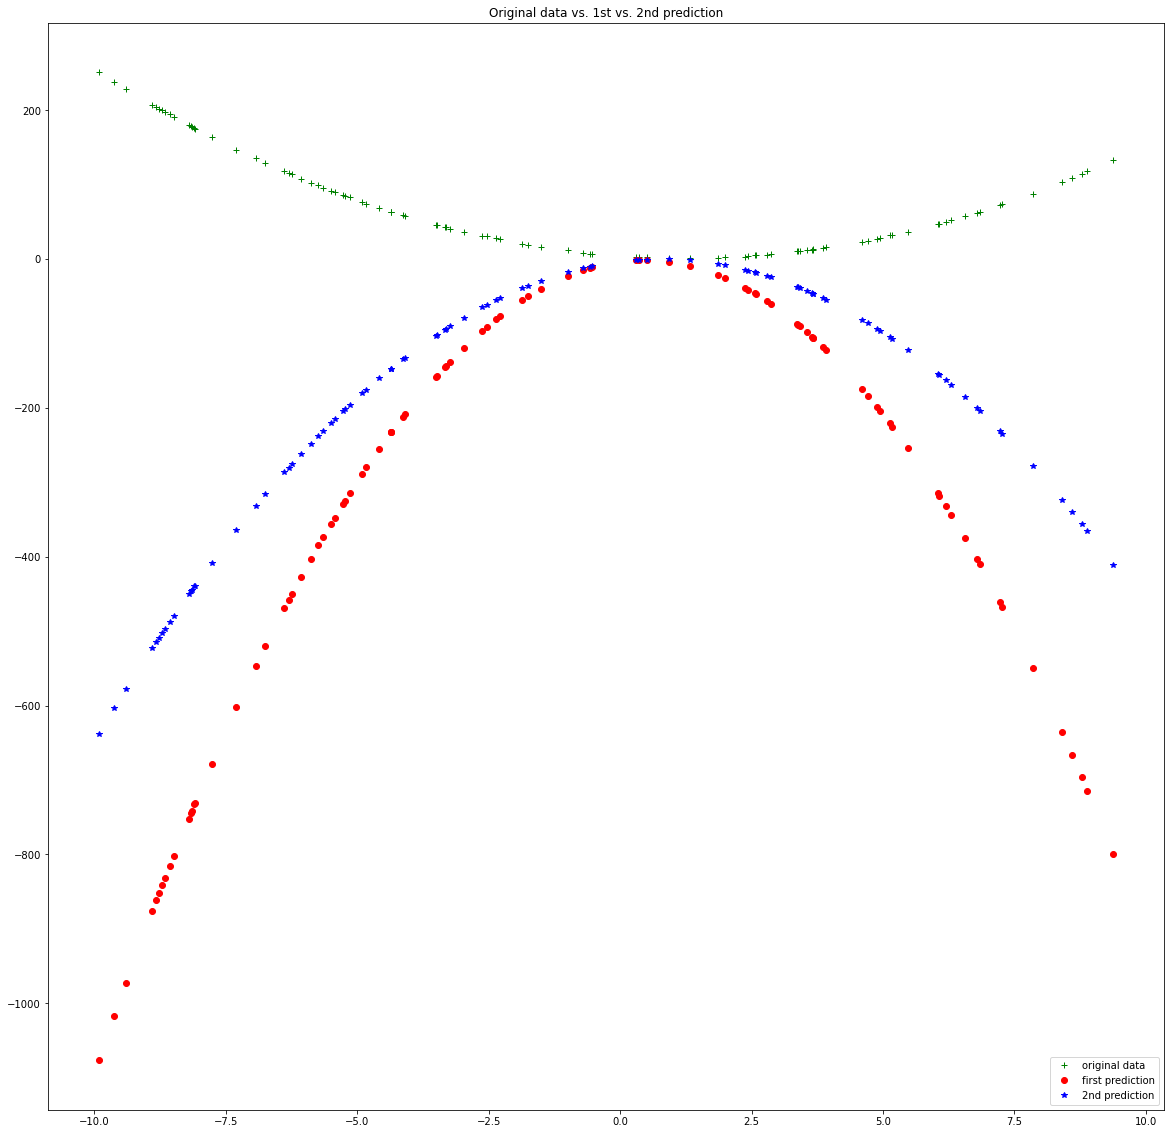

In [14]:
plt.figure(figsize=(20,20))
plt.plot(xs, ys, 'g+', label = 'original data')
plt.plot(xs, y_hat, 'ro', label = 'first prediction')
plt.plot(xs, new_y_hat, 'b*', label = '2nd prediction')
plt.title('Original data vs. 1st vs. 2nd prediction')
plt.legend(loc='lower right')
plt.show()

#### 多轮迭代梯度下降

对calc_gradient_2nd_poly 函数进行改进，使其更适用于梯度下降迭代过程

In [15]:
def calc_gradient_2nd_poly_for_GD(rand_coeffs, inputs_x, outputs_y, lr):
    """ Calculate the gradient for a second degree polynomial
       
       Args:
          coeffs： a, b and c for a 2nd degree polynomial [ y = a*x^2 + b* x + c]
          inputs_x: x input datapoints
          outputs_y: actual y output points
          lr : learning rate
     
       Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b and c, respectively
    """
    
    a_s = []
    b_s = []
    c_s = []
    
    y_hats = eval_2nd_degree(rand_coeffs, hundred_xs)
    
    for x, y, y_hat in list(zip(inputs_x, outputs_y, y_hats)):    # take tuple of (x_datapoint, actual y label and predict y label)
        x_squared = x ** 2 
        partial_a = x_squared * (y - y_hat)
        a_s.append(partial_a)
        partial_b = x * (y - y_hat)
        b_s.append(partial_b)
        partial_c = y - y_hat 
        c_s.append(partial_c)
        
    num = [i for i in y_hats]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    
    a_new = rand_coeffs[0] - lr * gradient_a
    b_new = rand_coeffs[1] - lr * gradient_b
    c_new = rand_coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)
    #print(f'New Model coeffs: {new_model_coeffs}')

    new_y_hat = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_hat)
    
    return updated_model_loss, new_model_coeffs, new_y_hat
    

In [16]:
calc_gradient_2nd_poly_for_GD(rand_coeffs, hundred_xs, ys, 0.0001)

(124358.87462283006,
 (-5.5648719718869595, 8.744210080709397, -3.9189744924295957),
 array([-1.96194382e+02, -6.37901028e+02, -1.47760539e+02, -1.80701385e+02,
        -1.47337728e+02, -2.04619368e+02, -4.87300639e+02, -2.00664487e+02,
        -5.49470200e+01, -3.66100202e+02, -4.34387695e+01, -1.57409203e+01,
        -1.46029292e+01, -4.69579413e+01, -9.71015141e+01, -1.22849147e+02,
        -1.32980064e+02, -8.63931485e+01, -6.83157438e+00, -6.19299075e+01,
        -9.39103796e+01, -1.07927285e+02, -4.08042819e+02, -9.06127138e+01,
        -4.44901777e+02, -1.00931790e+01, -3.23923072e+02, -4.69855882e+01,
        -1.63258815e+02, -6.03625763e+02, -1.54327546e+02, -9.39805439e+01,
        -2.48311108e+02, -3.83176079e+01, -1.81306689e+01, -5.02668068e+02,
        -1.79863132e+01, -2.30944086e+02, -3.56470847e+02, -4.38926160e+02,
        -5.29482983e+01, -2.37385983e+02, -2.34724535e+02, -2.86625578e+02,
        -5.28640542e+01, -4.50834190e+02, -5.08784343e+02, -1.35012682e+02,
   

函数calc_gradient_2nd_poly_for_GD()作为gradient_descent()函数的一部分被调用

In [17]:
def gradient_descent(epoches, lr):
    """
    Perform gradient descent for a second degree polynomial.
    
    Args: 
        epoches: number of iterations to perform of finding new coefficents and updating loss.
        lr: learning rate
    
    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_hat predictions, saved loss updates)
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    
    for i in range(epoches):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    
    #print(losses)
    return (loss[0], loss[1], loss[2], losses)

最后，训练1500轮，看看模型是否学到什么

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Original data vs. Final prediction after Gradient Descent')

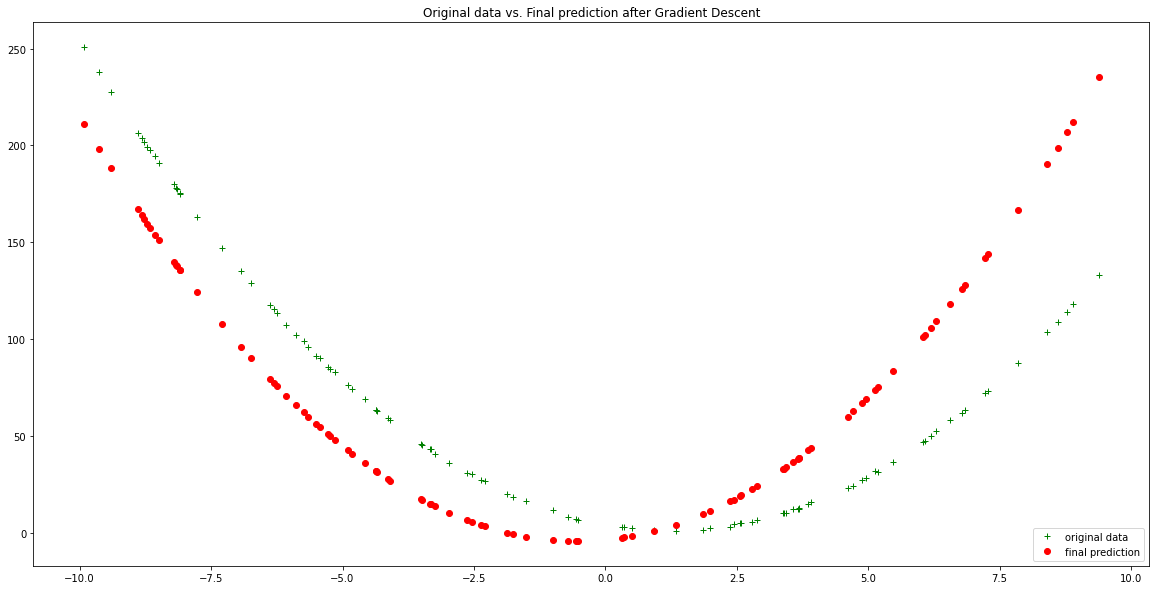

In [18]:
GD = gradient_descent(100, 0.0001)

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original data')
plt.plot(xs, GD[2], 'ro', label = 'final prediction')
plt.title('Original data vs. Final prediction after Gradient Descent')
plt.legend(loc='lower right')
plt.show()

In [19]:
print(f'Final Coefficients predicted: {GD[1]}')
print(f'Original Coefficients: {coeffs}')

Final Coefficients predicted: (2.4433440248208624, 2.5467341800935515, -3.761168282846845)
Original Coefficients: [2, -5, 4]


MSE 可视化

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Loss over 1500iterations')

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'MSE')

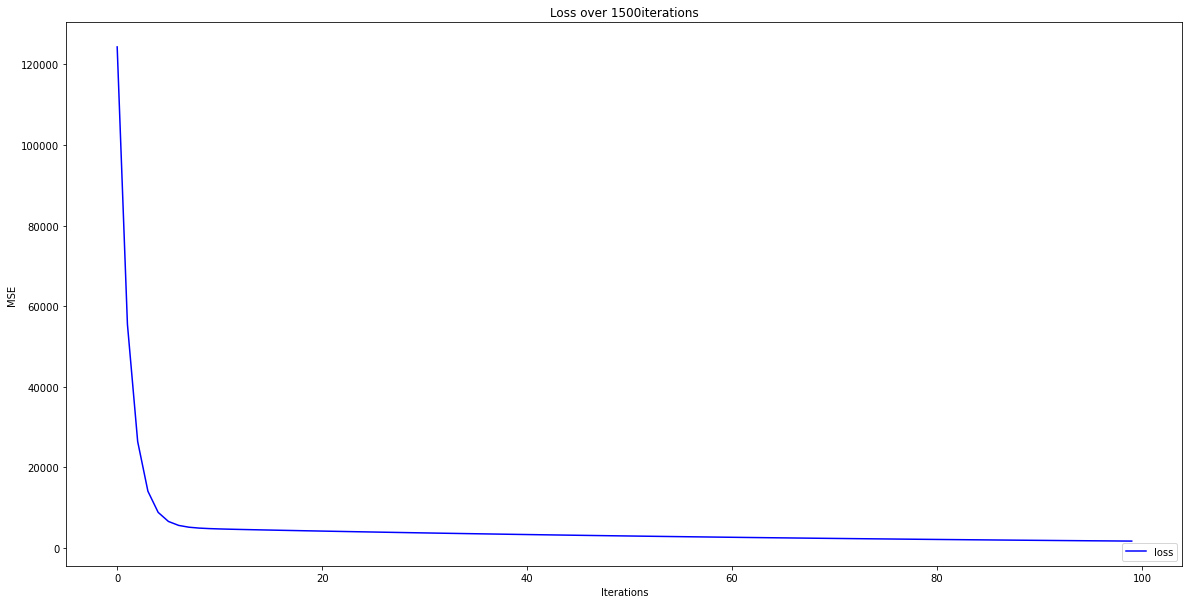

In [20]:
plt.figure(figsize=(20,10))
plt.plot(GD[3], 'b-', label ='loss')
plt.title('Loss over 1500iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()